# K-Means Clustering

Your assignment is to use the TMDB 5000 dataset from Kaggle to try and cluster similar movies. 

It may be helpful to use PCA to reduce the dimensions of your data first - but then again maybe not. I dunno, you're the data scientist, you tell me. 🤪 

I'll let you download the dataset and get it into your notebook in the way that works best for you:

<https://www.kaggle.com/tmdb/tmdb-movie-metadata/version/2>

There are a few weird data cleaning steps that you'll need to do that I don't want you to get stuck on or spend a lot of time on so I'll try and help you out a little bit. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/tmdb_5000_movies.csv")
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [0]:
# There's probably some pandas function that will do this but...
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)  

In [5]:
# Filter the dataframe by only the numeric columns
df_numeric = df[num_list]
df_numeric.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124


In [0]:
# lazily fill NaNs with zeros
movie_num = df_numeric.fillna(value=0, axis=1)

# You take it from here!

See what you can come up with. You have all the know-how! 

In [7]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [8]:
import seaborn as sns
print(sns.__version__)

0.9.0


### Drop the ID column, since it will change the results.  We don't need it anyway, and when we do we can append it to the DataFrame.

In [9]:
movies = movie_num.drop('id', axis = 1)
movies.head(5)

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800
1,300000000,139.082615,961000000,169.0,6.9,4500
2,245000000,107.376788,880674609,148.0,6.3,4466
3,250000000,112.312950,1084939099,165.0,7.6,9106
4,260000000,43.926995,284139100,132.0,6.1,2124


### Standardize the data by shifting it to the mean, and dividing it by the std dev of each feature.  Plot the data to see if there are any obvious clusters.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


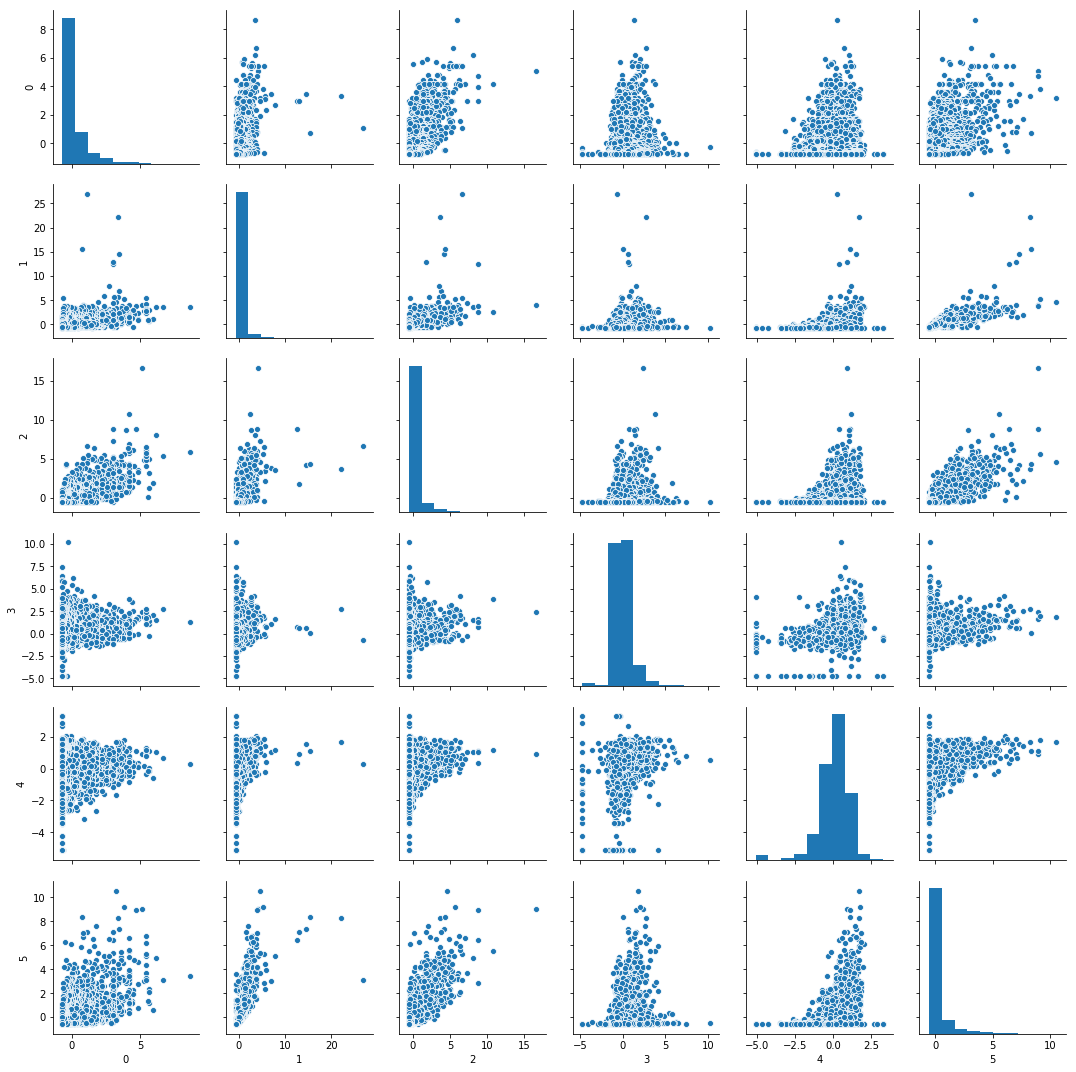

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(movies)
movies = pd.DataFrame(scalar.transform(movies))
sns.pairplot(movies);

### Looks like there are no clusters showing up when we plot each feature  against the other.

### Maybe it will be better if we keep all the dimensions - this will increase the distances between points, and maybe split them apart to create some clusters.

### Transform the dataset using PCA.  Calculating the full PCA using PCA() is sufficient.  ex. PCA(2) just tells PCA to stop at dimension 2.  With PCA(), we can still get values for lower dimensions from the output of PCA().  This is true of transform(df) as well

In [31]:
def pca_transform(df):
  pca = PCA()
  pca.fit(df)
  return (pca.explained_variance_, pca.transform(df))
  
def pcas(df):
  eigenvalues = None
  eigenvalues, t = pca_transform(df)
  transformed = pd.DataFrame(t, columns = 
                             ['pca' + str(j) for j in range(1, df.shape[1] + 1)])
    
  return (eigenvalues, transformed)

eigenvalues, transformed = pcas(movies)
print('transformed.shape:', transformed.shape)
print('eigenvalues:', eigenvalues)

transformed.shape: (4803, 6)
eigenvalues: [3.26606119 1.1505074  0.71277677 0.4539714  0.25797091 0.1599618 ]


### Plot the eigenvalues to see where the 'knee' occurs.  Everything beyond is probably not necessary.

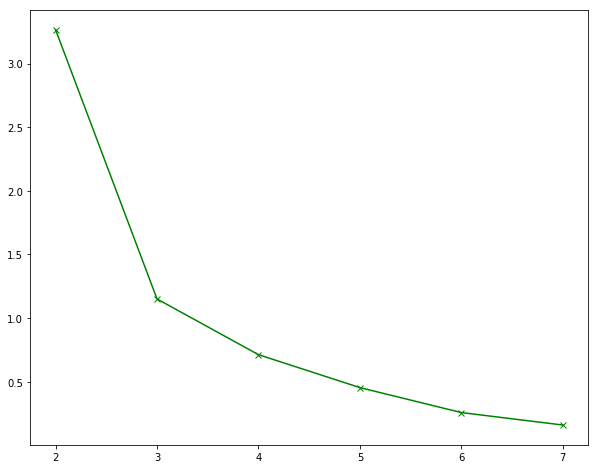

In [24]:
plt.figure(figsize = (10, 8))
plt.plot(range(2, 8), eigenvalues, 'gx-');

### Probably the knee is at 4, but let's do PCA for all dimensions and many k values to see what's best.

In [0]:
all_transformed = []
for i in range(2, transformed.shape[1] + 1):
  
  t = transformed.iloc[:, 0:i]
  all_transformed.append(t)

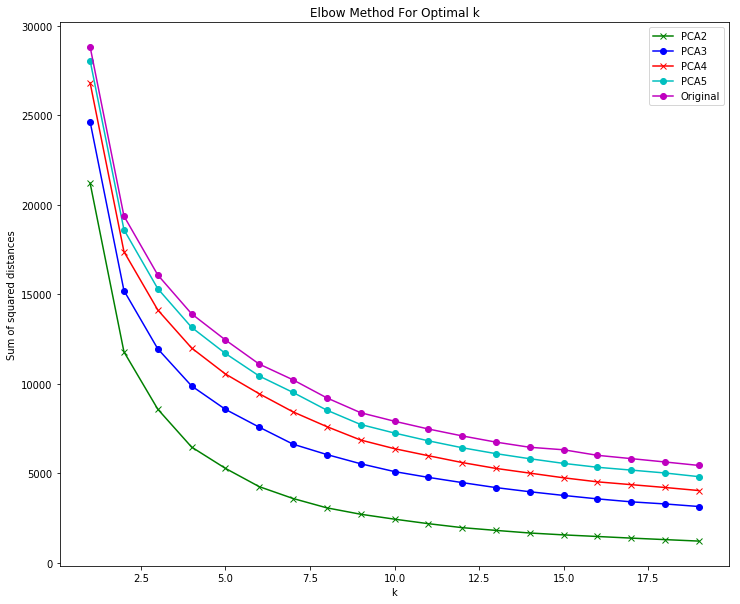

In [53]:
# Find out which k is best
def km_sum_of_squares(df):
  sum_of_squared_distances = []
  
  K = range(1, 20)
  for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)
    
  return sum_of_squared_distances

def elbows(df):
  plt.figure(figsize = (12, 10))
  colors = ['gx-', 'bo-', 'rx-', 'co-', 'mo-', 'ko-', 'yo-']

  for col in range(len(df.columns)):
    K = range(1, len(df.iloc[:, col]) + 1)
    if col == range(len(df.columns))[-1]:
      label = 'Original'
    else:
      label = 'PCA' + str(col + 2)

    plt.plot(K, df.iloc[:, col].values, colors[col], label = label)
    
  plt.legend()
  plt.xlabel('k')
  plt.ylabel('Sum of squared distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

sos = pd.DataFrame()
for i in range(len(all_transformed)):
  sos['PCA ' + str(i + 2)] = km_sum_of_squares(all_transformed[i])

elbows(sos)

### As the number of dimensions increased, the spread between points increased, and the sum of squared distances increased.  Don't know how to normalize for this to do an apples-to-apples comparison yet.  Comparison of the real errors (ignoring the dimensionality aspect) would have allowed us to select a PCA and k value by looking at the plot above.  Don't know how to do this yet.

### From the above plot, it looks like PCA of 2 dimensions and k value of 4 will give the least error.  This was not easily visible from the eigenvalues.  Let's plot the clusters for PCA 2

In [55]:
two_dims = all_transformed[0]
print('Shape for 2-D PCA:', two_dims.shape)
two_dims.head(5)

Shape for 2-D PCA: (4803, 2)


,pca1,pca2
0,17.516255,-4.094039
1,9.584677,-1.396844
2,7.946050,-1.761311
3,10.998706,-1.223685
4,4.231538,-1.214606


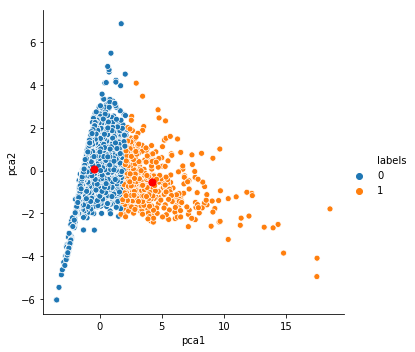

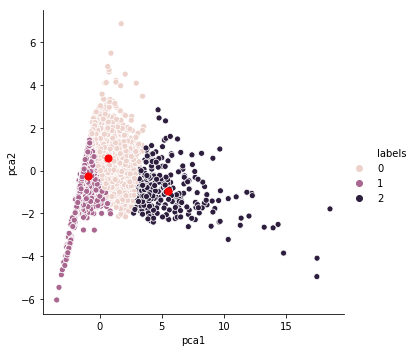

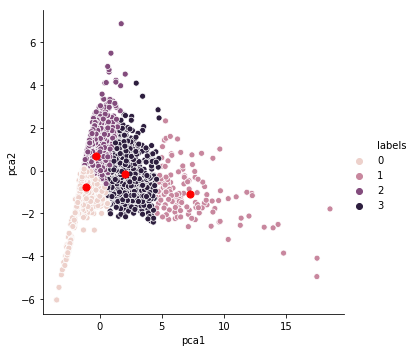

In [56]:
def plot_clusters(df):
  
  # fig, ax = plt.subplots(1, 3, sharex = True, sharey = True)
  for k in range(2, 5):
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    
    clusters = df.copy()
    clusters['labels'] = km.labels_    
    
    sns.relplot('pca1', 'pca2', hue = 'labels', 
                data = clusters)
    xs, ys = zip(*km.cluster_centers_)
    plt.scatter(xs, ys, color = 'red', s = 50)
    
    plt.show()

plot_clusters(two_dims)

### From the above plots, there does not seem to be a real separation between clusters.  Since we're asking the KMeans algorithm to form N clusters, it will do so, but we have to confirm with our eyes that it has found the correct clusters.  I don't think this is the case

### This just means that the movie data did not have any parameters that could be used for clustering.  Maybe we should:
  - select some other parameters (as in the stretch goal).
  - try applying a non-linear transformation to the PCA(2) points before clustering.
  
  https://people.revoledu.com/kardi/tutorial/Regression/nonlinear/NonLinearTransformation.htm
  
  Doesn't seem like there are any gaps between points, though.  Most of the points are overlapping each other, with a few individual points scattered around.  I don't think a non-linear transformation will help in this dataset.
  - try another algorithm (LDA maybe? But LDA is supervised, so what is our target/label?)

# Stretch Goal:

If you look at the original dataset you'll notice that I threw away some potentially useful columns. See if there are any that you could clean more effectively and turn into a numeric representation (probably some kind of one-hot-encoding of categorical variables) to assist your clustering. There's a lot more work here than the hours we have today however, so don't kill yourself trying to incorporate every single column from the original dataset, just take it one column at a time.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.